<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#base-linear" data-toc-modified-id="base-linear-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>base linear</a></span></li><li><span><a href="#base-keras" data-toc-modified-id="base-keras-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>base keras</a></span></li></ul></div>

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier

sns.set()

RANDOM = 1

%matplotlib inline

In [47]:
data = load_iris()

print('keys:', data.keys())
print('classes:', set(data['target']))

keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
classes: {0, 1, 2}


# base linear

In [16]:
model1 = LogisticRegression()
cv = StratifiedKFold(n_folds=5, y=data['target'], shuffle=True, random_state=RANDOM)
for score in cross_val_score(model1, data['data'], data['target'], cv=cv):
    print(score)

0.933333333333
1.0
0.966666666667
0.933333333333
0.966666666667


# base keras

In [36]:
def make_model():
    np.random.seed(RANDOM)
    
    model = Sequential()
    model.add(Dense(8, input_shape=(4, )))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model2 = KerasClassifier(build_fn=make_model, epochs=100, verbose=0)

for score in cross_val_score(model2, data['data'], data['target'], cv=cv):
    print(score)

0.966666638851
0.966666638851
0.933333337307
0.966666638851
1.0


In [54]:
def make_model():
    np.random.seed(RANDOM)
    
    model = Sequential()
    model.add(Dense(8, input_shape=(4, )))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model2 = KerasClassifier(build_fn=make_model, epochs=100, verbose=0)

scores = []
for score in cross_val_score(model2, data['data'], data['target'], cv=cv):
    scores.append(score)
    print(score)

0.966666638851
0.966666638851
0.933333337307
0.966666638851
1.0


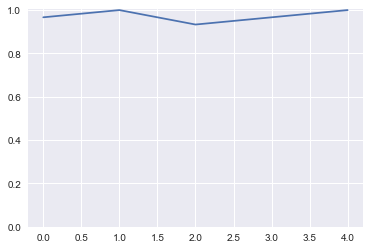

In [53]:
plt.plot(np.arange(5), scores)
plt.ylim(ymin=0)
plt.show()